# HHL Linear Solver 

This notebook illustrates how to use the HHL linear solver to solve individual linear systems. We will use sparse random matrices that mimc the matrices obtained by EPANET for small water networks.

Let's define the system:

In [1]:
import scipy.sparse as sp 
import numpy as np 

# set the seed
np.random.seed(134)

# size of the linear system
size = 8

# create the matrix
A = sp.random(size,size,density=0.25)
A = (A+A.T)/2
A = A.todense()
A

matrix([[0.98565359, 0.        , 0.36187767, 0.        , 0.        ,
         0.        , 0.47823527, 0.        ],
        [0.        , 0.        , 0.3762659 , 0.10824806, 0.        ,
         0.        , 0.        , 0.        ],
        [0.36187767, 0.3762659 , 0.        , 0.        , 0.        ,
         0.49122216, 0.        , 0.17939193],
        [0.        , 0.10824806, 0.        , 0.        , 0.1658684 ,
         0.        , 0.09509276, 0.344708  ],
        [0.        , 0.        , 0.        , 0.1658684 , 0.        ,
         0.4238214 , 0.        , 0.39627041],
        [0.        , 0.        , 0.49122216, 0.        , 0.4238214 ,
         0.91158043, 0.30766587, 0.08558759],
        [0.47823527, 0.        , 0.        , 0.09509276, 0.        ,
         0.30766587, 0.        , 0.        ],
        [0.        , 0.        , 0.17939193, 0.344708  , 0.39627041,
         0.08558759, 0.        , 0.        ]])

In [2]:
# create the right hand side
b = np.random.rand(size)
b

array([0.37177614, 0.18457065, 0.48317348, 0.46566253, 0.34640372,
       0.12657883, 0.12525871, 0.12461173])

## Solve the problem classically
We can solve this sytem with a classical linear solver to obtain a reference solution

In [3]:
reference = np.linalg.solve(A,b)
reference

array([ 0.43756972,  0.57926785,  0.54508793, -0.18963252,  0.27896845,
       -0.21442054, -0.53691392,  1.18286343])

## Solve the problem with the HHL linear solver
We can now use the VQLS solver to solve the problem

In [4]:
from wntr_quantum.linear_solver import HHL_SOLVER
from qiskit.primitives import Estimator, Sampler 

# define estimator
estimator = Estimator()
sampler = Sampler()

# define the solver
hhl = HHL_SOLVER(
    estimator=estimator,
    sampler=sampler)

/tmp/ipykernel_18717/3699590503.py:5: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
/tmp/ipykernel_18717/3699590503.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [6]:
res = hhl(A, b)

/home/nico/miniconda3/envs/vitens_wntr_1/lib/python3.9/site-packages/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


In [7]:
res

HHLResult(solution=array([ 0.436,  0.593,  0.549, -0.181,  0.275, -0.218, -0.544,  1.182]), residue=0.007372666680640602, ref=array([0., 0., 0., 0., 0., 0., 0., 0.]))

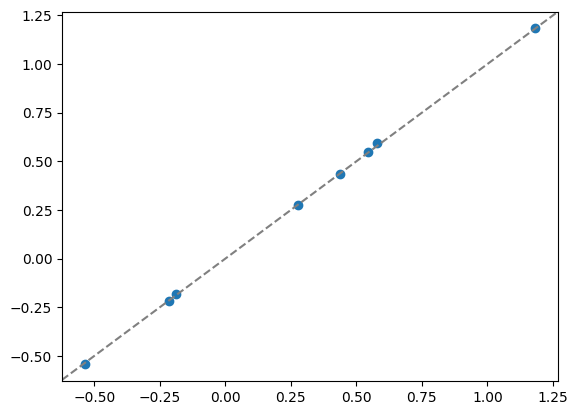

In [8]:
import matplotlib.pyplot as plt
plt.scatter(reference, res.solution)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()